In [1]:
# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

from tqdm import tqdm
import string
import statistics
import re
import joblib
import random
import statistics
from collections import Counter
from scipy import stats
import os
# import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import cosine_similarity
import zipfile
from matplotlib.lines import Line2D
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
bdlc = pd.read_parquet('/kaggle/input/esports-data/live_comments_2/bangladesh_livechat_data.parquet')
# brlc = pd.read_parquet('/kaggle/input/esports-data/live_comments_2/brasil_livechat_data.parquet')
# idlc = pd.read_parquet('/kaggle/input/esports-data/live_comments_2/indonesia_livechat_data.parquet')
# mllc = pd.read_parquet('/kaggle/input/esports-data/live_comments_2/malaysia_livechat_data.parquet')

# pklc = pd.read_parquet('/kaggle/input/esports-data/live_comments_2/pakistan_livechat_data.parquet')
indlc = pd.read_parquet('/kaggle/input/esports-data/live_comments/india_livechat_data.parquet')
ind2lc = pd.read_parquet('/kaggle/input/esports-data/live_comments/indiav2_livechat_data.parquet')
# trlc = pd.read_parquet('/kaggle/input/esports-data/live_comments/turkey_livechat_data.parquet')
# vnlc = pd.read_parquet('/kaggle/input/esports-data/live_comments/vietnam_livechat_data.parquet')

In [4]:
bdlc = pd.concat([indlc, ind2lc], ignore_index=True)

In [5]:
# dfs_lc = ['bdlc', 'idlc', 'mllc', 'pklc', 'inlc', 'vnlc']
# sm = 0
# for df_name in dfs_lc:
#     df = globals()[df_name]
#     print(f"Length of {df_name}: {len(df)/1e6:.2f}M")
#     sm+=len(df)

# print(f'Total is {sm/1e6:.2f}M')
# print(f'Total in crore {sm/1e7:.2f}Corer')

## Bangladesh

In [6]:
import emoji

def replace_emoji_codes(text):
    """
    Replace text-based emoji codes with actual emojis using the `emoji` library.

    Parameters:
    - text (str): The input text containing emoji codes.

    Returns:
    - str: The text with emoji codes replaced by actual emojis.
    """
    # Convert text-based emoji codes to actual emojis
    return emoji.emojize(text)

# Example usage
text = "A1 :red_heart: A1 :red_heart:"
converted_text = replace_emoji_codes(text)
print(converted_text)  # Output: "A1 ❤️ A1 ❤️"

import re

def count_words(text):
    # Remove punctuations using regular expression
    text_without_punctuations = re.sub(r'[^\w\s]', '', text)

    # Split the text into words based on whitespace characters
    words = text_without_punctuations.split()

    # Get the number of words
    word_length = len(words)

    return word_length


A1 ❤️ A1 ❤️


In [7]:
tqdm.pandas()

In [8]:
bdlc['wordcount'] = bdlc.message.progress_apply(count_words)

bdlc = bdlc.sort_values(by='wordcount', ascending=False).reset_index(drop=True)

100%|██████████| 9129475/9129475 [01:08<00:00, 134147.72it/s]


In [9]:
bdlc.tail()

,datetime,author,message,video_id,wordcount
9129470,2024-06-30 10:46:49,pawan baneshi,.,vaFUmeNxl7A,0
9129471,2024-06-30 10:49:03,sudip das,",",vaFUmeNxl7A,0
9129472,2024-06-30 10:49:53,Justin,?,vaFUmeNxl7A,0
9129473,2024-06-30 10:54:09,NX gaming,.,vaFUmeNxl7A,0
9129474,2024-06-30 10:54:33,Yash Barad,,vaFUmeNxl7A,0


## Checkpoint for filter

In [10]:
th = 200_000


filt = bdlc[:th].copy()
filt.head()

,datetime,author,message,video_id,wordcount
0,2023-06-01 10:48:59,Sonjeeb Debnath,D Y N A M O D Y N A M O D Y N A M O D Y N A M ...,skLc-IYhedU,97
1,2023-06-01 10:49:05,Sonjeeb Debnath,D Y N A M O D Y N A M O D Y N A M O D Y N A M ...,skLc-IYhedU,97
2,2023-06-01 15:32:02,Sonatan Adhikary,o y o y o y o y o y o y o y o y o y o y o y o ...,LIOxK6Rd5TY,81
3,2023-06-01 12:32:30,Rahul Yadav,TX :star: TX :star: TX :star: TX :star: TX :st...,skLc-IYhedU,80
4,2023-06-01 12:39:24,Rahul Yadav,TX :star: TX :star: TX :star: TX :star: TX :st...,skLc-IYhedU,80


In [11]:
filt['message'] = filt.message.progress_apply(replace_emoji_codes)

# filt = filt[filt['wordcount'] >= 2]

filt.tail()

100%|██████████| 200000/200000 [00:06<00:00, 33311.03it/s]


,datetime,author,message,video_id,wordcount
199995,2023-06-01 14:54:00,Kanhiya Naik,Shreeman legand ❤️🔥💯 Shreeman legand ❤️🔥💯 Shre...,skLc-IYhedU,15
199996,2023-07-21 06:39:49,Prathamesh Nambiar,guys kisi player ko hate mat do device bhi toh...,XnYnBTGFxuM,15
199997,2021-12-11 12:00:31,INVxRyZeN Op,Jonathan Op❤️ Jonathan Op❤️ Jonathan Op❤️Jonat...,t-DpjMXd3x4,15
199998,2022-06-04 12:23:24,ANISH,kids saying hector is useless but only tru fan...,Dwibj3Gbyo4,15
199999,2021-12-24 13:26:55,supernova ☄️,bgmi lite💙💙💙bgmi lite💕💕💕bgmi lite❤️❤️❤️bgmi li...,h9H1B4trTIQ,15


In [12]:
print(bdlc.shape)
print(filt.shape)

(9129475, 5)
(200000, 5)


In [13]:
filt['datetime'] = pd.to_datetime(filt['datetime'])

# Extract the year and create a new column 'year'
filt['year'] = filt['datetime'].dt.year

filt.year.value_counts()

year
2022    74432
2023    53360
2021    38237
2024    33971
Name: count, dtype: int64

In [14]:
(365532/1998563)*100

18.28974117903714

In [15]:
(24544/100000)*100

24.544

In [16]:
# tqdm.pandas()
# filt['message'] = filt.message.progress_apply(replace_emoji_codes)
# filt.head(2)

In [17]:
filt.wordcount.describe()

count    200000.000000
mean         22.916370
std           7.689112
min          15.000000
25%          17.000000
50%          21.000000
75%          27.000000
max          97.000000
Name: wordcount, dtype: float64

In [18]:
# filt['message'][61224]

In [19]:
import torch
print(torch.cuda.is_available())  # Should print True if GPU is available
print(torch.cuda.current_device())  # Prints the ID of the current device
print(torch.cuda.get_device_name(0))  # Prints the name of the GPU

True
0
Tesla T4


In [20]:
model_path = 'cardiffnlp/twitter-roberta-base-sentiment-latest'

In [21]:
from transformers import pipeline
sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path, device=0)
sentiment_task("Covid cases are increasing fast!")

2024-08-16 20:40:59.284070: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-16 20:40:59.284211: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-16 20:40:59.427855: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

[{'label': 'negative', 'score': 0.7235766649246216}]

In [22]:
def make_pred(text):
    try:
        return sentiment_task(text)[0]['label']
    except:
        return 'neutral'
make_pred('i love you.')

'positive'

In [23]:
xt = filt['message'][6125]
make_pred(xt)

'neutral'

In [24]:
filt['sentiment'] = filt.message.progress_apply(make_pred)

 13%|█▎        | 25456/200000 [05:25<35:16, 82.46it/s]/usr/local/src/pytorch/aten/src/ATen/native/cuda/Indexing.cu:1292: indexSelectLargeIndex: block: [192,0,0], thread: [32,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
/usr/local/src/pytorch/aten/src/ATen/native/cuda/Indexing.cu:1292: indexSelectLargeIndex: block: [192,0,0], thread: [33,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
/usr/local/src/pytorch/aten/src/ATen/native/cuda/Indexing.cu:1292: indexSelectLargeIndex: block: [192,0,0], thread: [34,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
/usr/local/src/pytorch/aten/src/ATen/native/cuda/Indexing.cu:1292: indexSelectLargeIndex: block: [192,0,0], thread: [35,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
/usr/local/src/pytorch/aten/src/ATen/native/cuda/Indexing.cu:1292: indexSelectLargeIndex: block: [192,0,0], thread: [36,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
/usr/local/src/pytorch/aten/src/ATen/native/cuda/Indexing.cu:1292: indexSelectLar

In [25]:
filt.sentiment.value_counts()

sentiment
neutral     187123
positive     10180
negative      2697
Name: count, dtype: int64

In [26]:
filt.tail()

,datetime,author,message,video_id,wordcount,year,sentiment
199995,2023-06-01 14:54:00,Kanhiya Naik,Shreeman legand ❤️🔥💯 Shreeman legand ❤️🔥💯 Shre...,skLc-IYhedU,15,2023,neutral
199996,2023-07-21 06:39:49,Prathamesh Nambiar,guys kisi player ko hate mat do device bhi toh...,XnYnBTGFxuM,15,2023,neutral
199997,2021-12-11 12:00:31,INVxRyZeN Op,Jonathan Op❤️ Jonathan Op❤️ Jonathan Op❤️Jonat...,t-DpjMXd3x4,15,2021,neutral
199998,2022-06-04 12:23:24,ANISH,kids saying hector is useless but only tru fan...,Dwibj3Gbyo4,15,2022,neutral
199999,2021-12-24 13:26:55,supernova ☄️,bgmi lite💙💙💙bgmi lite💕💕💕bgmi lite❤️❤️❤️bgmi li...,h9H1B4trTIQ,15,2021,neutral


In [27]:
# make_pred('বালের খেলা করো। ফালতু যতসব। ')

In [28]:
filt.year.value_counts()

year
2022    74432
2023    53360
2021    38237
2024    33971
Name: count, dtype: int64

In [29]:
grouped = filt.groupby(['year', 'sentiment']).size().unstack(fill_value=0)

In [30]:
grouped

sentiment,negative,neutral,positive
year,,,
2021,743,34513,2981
2022,1098,70192,3142
2023,527,49248,3585
2024,329,33170,472


In [31]:
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100
grouped_percentage

sentiment,negative,neutral,positive
year,,,
2021,1.943144,90.260742,7.796114
2022,1.475172,94.303525,4.221303
2023,0.987631,92.293853,6.718516
2024,0.968473,97.642107,1.389420


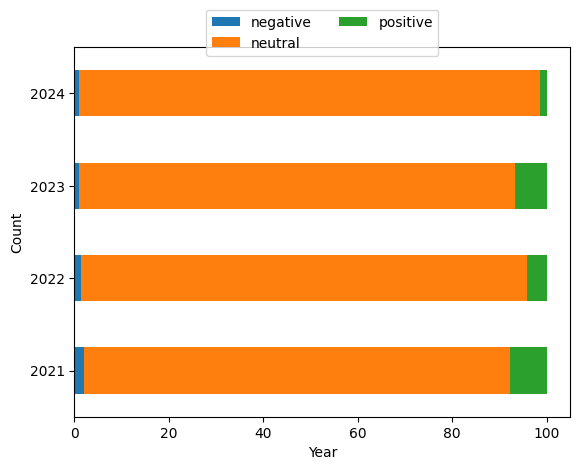

In [32]:
# Plotting the stacked bar chart
grouped_percentage.plot(kind='barh', stacked=True)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
# plt.title('Sentiment Distribution by Year')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=2)

# Display the plot
plt.show()

In [33]:
# from transformers import pipeline
# from datasets import Dataset
# # import pandas as pd
# # Example data
# data = {
#     'text': [
#         "Covid cases are increasing fast!",
#         "I am feeling great today!",
#         "This is a terrible situation.",
#         # Add more examples as needed
#     ]
# }
# df = pd.DataFrame(data)
# dataset = Dataset.from_pandas(df)

# dataset

In [34]:

# # Define the function to analyze sentiments
# def analyze_sentiments(batch):
#     results = sentiment_task(batch['message'])
#     return {'sentiment': [result['label'] for result in results],
#             'score': [result['score'] for result in results]}

In [35]:





# # Apply sentiment analysis to the dataset
# results_dataset = dataset.map(analyze_sentiments, batched=True)

# # # Convert results to a DataFrame
# results_df = pd.DataFrame(results_dataset)

# # # Print results
# # print(results_df.head())


In [36]:
# results_df

In [37]:
# dataset = Dataset.from_pandas(filt)
# dataset

In [38]:
# results_dataset = dataset.map(analyze_sentiments, batched=True)